<a href="https://colab.research.google.com/github/aditiitomar/Plant-Disease-Prediction/blob/main/Plant_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a Neural Network which is able to identify disease in a plant.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Linking kaggle dataset with google colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [11]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
# importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print("TensorFlow version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


TensorFlow version: 2.15.0
GPU is available


In [14]:
!nvidia-smi

Sat Jun  1 16:42:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [15]:
# data preprocessing
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred", #select name of the directory(train) as label
    label_mode="categorical", #this model will choose one category out of 38 provided
    class_names=None,
    color_mode="rgb",
    batch_size=32, #at a time we'll feed 32 images to neural network
    image_size=(128, 128),
    shuffle=True, #to reduce biasness of model
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [16]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [17]:
# CNN
# Input image--> convolutions --> Pooling --> fully connected
# convolutions reduce the size of images to important features

# building model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
model= Sequential()

# building Convolution Layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=65,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Dropout(0.4))

In [23]:
# flattening process
model.add(Flatten())

In [24]:
model.add(Dropout(0.25))

In [25]:
# hidden layer
model.add(Dense(units=1500,activation='relu'))

In [26]:
# output layer
model.add(Dense(units=38,activation='softmax'))

In [27]:
# compiling model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
# visualizing entire parameter of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 65)        37505     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 65)        0         
 g2D)                                                   

In [29]:
# model training
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 185s 79ms/step - loss: 1.3869 - accuracy: 0.5901 - val_loss: 0.4801 - val_accuracy: 0.8458
Epoch 2/10
2197/2197 [==============================] - 170s 77ms/step - loss: 0.4662 - accuracy: 0.8518 - val_loss: 0.2713 - val_accuracy: 0.9123
Epoch 3/10
2197/2197 [==============================] - 170s 78ms/step - loss: 0.2805 - accuracy: 0.9078 - val_loss: 0.2004 - val_accuracy: 0.9347
Epoch 4/10
2197/2197 [==============================] - 170s 77ms/step - loss: 0.1981 - accuracy: 0.9357 - val_loss: 0.2080 - val_accuracy: 0.9333
Epoch 5/10
2197/2197 [==============================] - 170s 77ms/step - loss: 0.1521 - accuracy: 0.9495 - val_loss: 0.1874 - val_accuracy: 0.9542
Epoch 6/10
2197/2197 [==============================] - 170s 77ms/step - loss: 0.1190 - accuracy: 0.9609 - val_loss: 0.1366 - val_accuracy: 0.9574
Epoch 7/10
2197/2197 [==============================] - 171s 78ms/step - loss: 0.0956 - accuracy: 0.9689 - val_loss: 0

In [30]:
# model evaluation on training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 62s 28ms/step - loss: 0.0343 - accuracy: 0.9891


In [ ]:
print(train_loss,train_acc)

In [32]:
# model evaluation on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 16s 29ms/step - loss: 0.1168 - accuracy: 0.9673


In [ ]:
print(val_loss,val_acc)

In [ ]:
# saving model
model.save("trained_model.keras")

In [35]:
training_history.history

{'loss': [1.3869189023971558,
  0.4662122428417206,
  0.2804742455482483,
  0.19811923801898956,
  0.15207421779632568,
  0.11899496614933014,
  0.09564793854951859,
  0.08275065571069717,
  0.07260115444660187,
  0.06187697872519493],
 'accuracy': [0.5901415348052979,
  0.8517533540725708,
  0.9078313112258911,
  0.9356995224952698,
  0.9494842886924744,
  0.960850715637207,
  0.9688882827758789,
  0.9724873900413513,
  0.9764990210533142,
  0.9792588353157043],
 'val_loss': [0.4801439046859741,
  0.27128341794013977,
  0.20037731528282166,
  0.20803044736385345,
  0.18736106157302856,
  0.1366366147994995,
  0.13637599349021912,
  0.12553080916404724,
  0.09903692454099655,
  0.1168423518538475],
 'val_accuracy': [0.8457773923873901,
  0.9123036861419678,
  0.9347257018089294,
  0.9333029985427856,
  0.954245388507843,
  0.9574322700500488,
  0.9581151604652405,
  0.9638060331344604,
  0.9694969058036804,
  0.967277467250824]}

In [36]:
# recording history in JSON
import json
with open("training_hist","w") as f:
  json.dump(training_history.history,f)


In [37]:
training_history.history['accuracy']

[0.5901415348052979,
 0.8517533540725708,
 0.9078313112258911,
 0.9356995224952698,
 0.9494842886924744,
 0.960850715637207,
 0.9688882827758789,
 0.9724873900413513,
 0.9764990210533142,
 0.9792588353157043]

In [38]:
training_history.history['val_accuracy']

[0.8457773923873901,
 0.9123036861419678,
 0.9347257018089294,
 0.9333029985427856,
 0.954245388507843,
 0.9574322700500488,
 0.9581151604652405,
 0.9638060331344604,
 0.9694969058036804,
 0.967277467250824]

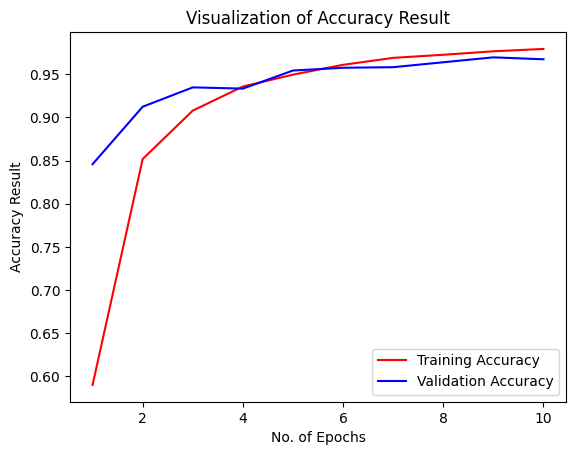

In [39]:
# accuracy visualization
# training & validation accuracy
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [40]:
# some other metrics for model evaluation
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [41]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [42]:
# prediction
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 16s 29ms/step


(array([[9.9999702e-01, 1.0962076e-08, 2.1353128e-10, ..., 3.9304734e-15,
         5.6203401e-14, 1.3710189e-12],
        [1.0000000e+00, 4.3709615e-08, 2.3830101e-11, ..., 1.3890536e-19,
         4.5990264e-15, 4.3042926e-17],
        [1.0000000e+00, 4.3657777e-16, 6.2220331e-18, ..., 2.8658613e-28,
         4.9271471e-24, 7.6686099e-24],
        ...,
        [3.9662758e-13, 6.1612435e-16, 3.2592496e-12, ..., 5.4480908e-14,
         4.9880834e-15, 9.9999988e-01],
        [3.1205002e-14, 7.1645458e-19, 1.5845621e-15, ..., 1.6366471e-14,
         2.4163147e-16, 1.0000000e+00],
        [6.6767850e-21, 4.2655220e-24, 1.2022437e-21, ..., 5.6411633e-24,
         4.5035239e-22, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

In [ ]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
Y_true=tf.argmax(true_categories,axis=1)
Y_true

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names=class_name))

In [ ]:
cm=confusion_matrix(Y_true,predicted_categories)
cm.shape

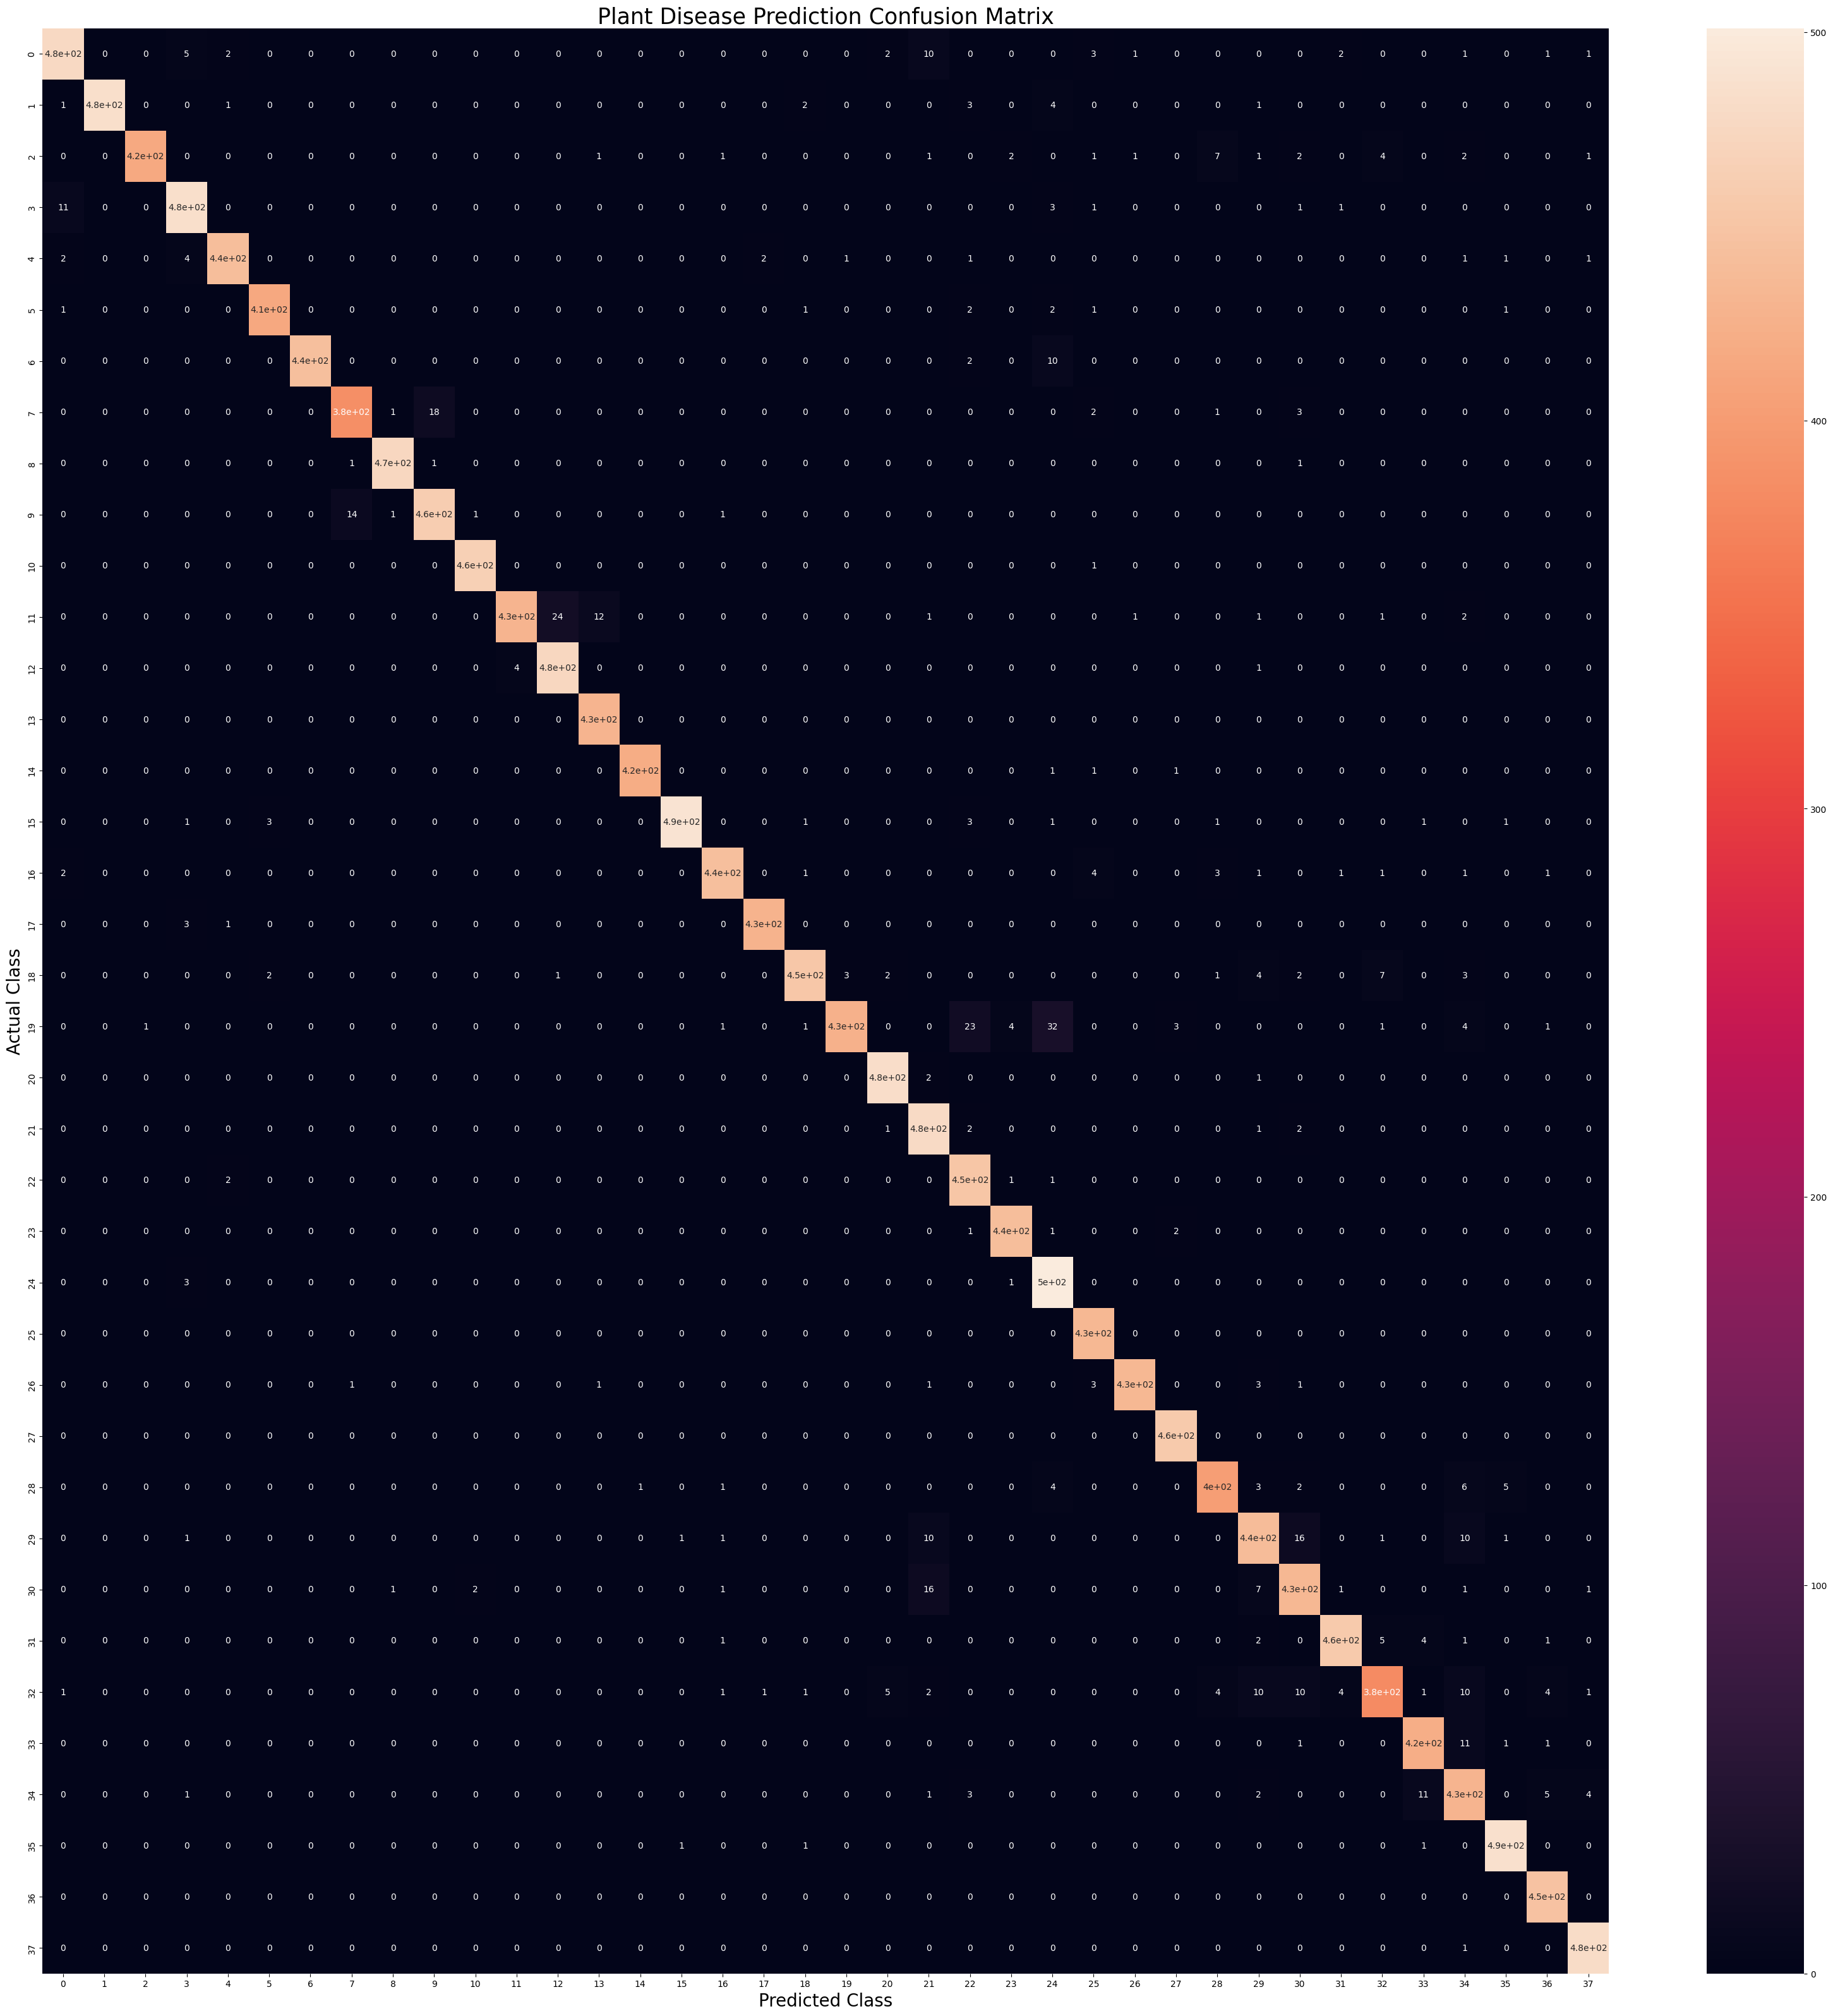

In [47]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size': 10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

In [ ]:
! streamlit run main.py & npx localtunnel --port 8501

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# loading model
model = tf.keras.models.load_model('trained_model.keras')
model.summary()

In [ ]:
# visualizing single image of test set
# !pip install opencv-python
import cv2
image_path='/content/test/test/AppleCedarRust1.JPG'
# reading image
img=cv2.imread(image_path)
# convert BGR image to RGB
img=cv2.cvColor(img,cv2.COLOR_BGR2RGB)
# displaying image
plt.imshow(img)
plt.title('Tets Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# testing image
image =tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr]) #converting single image to a batch
print(input_arr.shape)

In [ ]:
prediction=model.predict(input_arr)
prediction,prediction.shape

In [ ]:
result_index=np.argmax(prediction)
result_index

In [ ]:
class_name=['Apple___Apple_scab',
            'Apple___Black_rot',
            'Apple___Cedar_apple_rust',
            'Apple___healthy',
            'Blueberry___healthy',
            'Cherry_(including_sour)___Powdery_mildew',
            'Cherry_(including_sour)___healthy',
            'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
            'Corn_(maize)___Common_rust_',
            'Corn_(maize)___Northern_Leaf_Blight',
            'Corn_(maize)___healthy',
            'Grape___Black_rot',
            'Grape___Esca_(Black_Measles)',
            'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
            'Grape___healthy',
            'Orange___Haunglongbing_(Citrus_greening)',
            'Peach___Bacterial_spot',
            'Peach___healthy',
            'Pepper,_bell___Bacterial_spot',
            'Pepper,_bell___healthy',
            'Potato___Early_blight',
            'Potato___Late_blight',
            'Potato___healthy',
            'Raspberry___healthy',
            'Soybean___healthy',
            'Squash___Powdery_mildew',
            'Strawberry___Leaf_scorch',
            'Strawberry___healthy',
            'Tomato___Bacterial_spot',
            'Tomato___Early_blight',
            'Tomato___Late_blight',
            'Tomato___Leaf_Mold',
            'Tomato___Septoria_leaf_spot',
            'Tomato___Spider_mites Two-spotted_spider_mite',
            'Tomato___Target_Spot',
            'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
            'Tomato___Tomato_mosaic_virus',
            'Tomato___healthy']

In [ ]:
# displaying result of disease prediction
model_prediction=class_name[result_index]
plt.imshow(img)
plt.titile(f"Disease Name: {model_prediction}")
plt.xticks({})
plt.yticks({})
plt.show()